#  Linear Regression

##### Josep Fortiana 2019-10-01

## 1. Simple linear regression: A simulated example

### Generate a simulated dataset for simple linear regression

In [1]:
# More or less arbitrary parameters for the data generation

trueA<-1   
trueB<-5
trueSd<-15
sampleSize<-20 # n = sampleSize 

In [2]:
# Uniformly spread x values in the interval [-n/2,n/2]
x<-(-(sampleSize-1)/2):((sampleSize-1)/2)
# y values of the form a + b*x + N(0,trueSd)
y<-trueA+trueB*x+rnorm(n=sampleSize,mean=0,sd=trueSd)

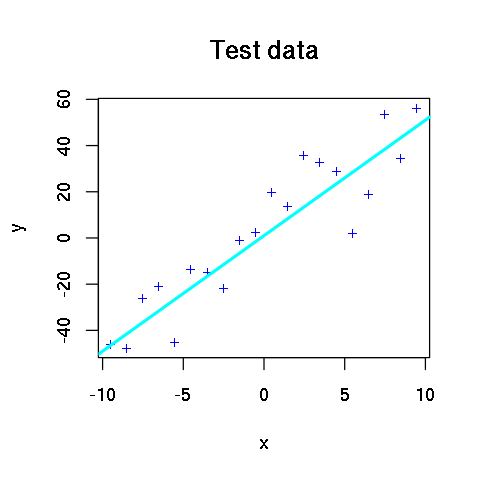

In [3]:
# Plot data points plus the line used in the generation
# Note this line is NOT a regression line, which will be computed below
options(repr.plot.width=4, repr.plot.height=4)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data")
abline(trueA,trueB,lwd=2.5,col="cyan")

### Adjust a least squares linear regression model

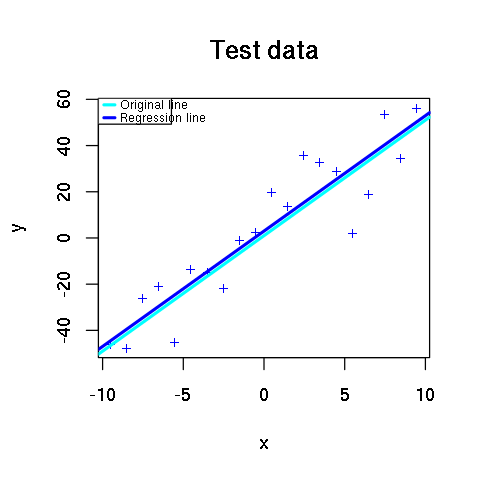

In [4]:
lm.1<-lm(y~x)
options(repr.plot.width=4, repr.plot.height=4)
plot(x,y,pch='+',cex=0.8,col="blue",main="Test data")
abline(trueA,trueB,lwd=2.5,col="cyan")
abline(lm.1,lwd=2.5,col="blue")
legend("topleft",c("Original line","","Regression line"), lwd=2.5,col=c("cyan","white","blue"),cex=0.6)

### Extract information from the fitted model

In [5]:
print(lm.1)
summary(lm.1)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
      2.993        4.995  




Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.331  -8.847   3.153   8.481  20.071 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.9929     2.9030   1.031    0.316    
x             4.9945     0.5035   9.921 1.01e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12.98 on 18 degrees of freedom
Multiple R-squared:  0.8454,	Adjusted R-squared:  0.8368 
F-statistic: 98.42 on 1 and 18 DF,  p-value: 1.01e-08


### Regression coefficients

In [6]:
Coeff<-coefficients(lm.1)
Coeff
a.hat<-Coeff[1]
b.hat<-Coeff[2]
#a.hat<-as.numeric(lm.1$coefficients[1])
#b.hat<-as.numeric(lm.1$coefficients[2])
round(a.hat,3)
round(b.hat,3)

(Intercept)           x 
   2.992933    4.994530

(Intercept) 
      2.993

x 
4.995

## 2. Relevant quantities in a regression

### 1. Total Sum of Squares

In [7]:
# Total sum of squares
TotalSS<-sum(y^2)
round(TotalSS,3)
# Centered data
y0<-y-mean(y)   
# Centered total sum of squares
TotalSS0<-sum(y0^2)        
round(TotalSS0,3)
# Total number of degrees of freedom
n<-length(y)
Totaldf<-n
# Total number of degrees of freedom of the centered y
Totaldf0<-n-1
Totaldf
Totaldf0

[1] 19801.75

[1] 19622.59

[1] 20

[1] 19

### 2. Fitted values and Regression Sum of Squares

In [8]:
# Fitted values
yhat<-fitted.values(lm.1)
#yhat<-as.numeric(lm.1$fitted.values) # Alternative syntax
# Centered fitted values
yhat0<-yhat-mean(yhat)
# Regression Sum of Squares
RegSS<-sum(yhat^2)
round(RegSS,3)
# Centered Regression Sum if Squares
RegSS0<-sum(yhat0^2)
round(RegSS0,3)
# Number of degrees of freedom of the regression
Regdf<-2
# Number of degrees of freedom of the regression (centered)
Regdf0<-1

Regdf
Regdf0

[1] 16767.8

[1] 16588.65

[1] 2

[1] 1

Check that `mean(y)` coincides with `mean(yhat)`

### 3. Regression residuals and Residual Sum of Squares

In [9]:
# The regression residuals can be extracted as:
ytilde<-residuals(lm.1)
# ytilde<-as.numeric(lm.11$residuals) # Alternative syntax
# Also: 
# ytilde<-y-yhat 
# or
# ytilde<-y0-yhat0
#
# Note that, since both y and yhat have the same mean, regression residuals are centered.
ResSS<-sum(ytilde^2)
Resdf<-Totaldf0-Regdf0
round(ResSS,3)
Resdf

[1] 3033.948

[1] 18

### 4. [Total Sum of Squares]  =  [Regression Sum of Squares]  +  [Residual Sum of Squares]

In [10]:
# Both with the non-centered and with the centered version
round(TotalSS-(RegSS+ResSS),10)
round(TotalSS0-(RegSS0+ResSS),10)

[1] 0

[1] 0

### 5. Regression Coefficient of Determination (Multiple R-squared)

In [11]:
# By definition, with the centered sums of squares
R2<-RegSS0/TotalSS0
round(R2,4)

[1] 0.8454

### 6. Adjusted Coefficient of Determination (Adjusted for the number $p$ of predictors)

$$
    {\bar {R}}^{2}=1-(1-R^{2})\dfrac{n-1}{n-p-1}
$$

The Adjusted Coefficient of Determination is also equal to:

$$
    {\displaystyle {\bar {R}}^{2}={1-{SS_{\text{res}}/{\text{df}}_{e} \over SS_{\text{tot}0}/{\text{df}}_{t0}}}}
$$

In [12]:
p<-1
R2adj.1<-1-(1-R2)*(n-1)/(n-p-1)
round(R2adj.1,4)
R2adj.2<-1-(ResSS/Resdf)/(TotalSS0/Totaldf0)
round(R2adj.1,4)

[1] 0.8368

[1] 0.8368

### 7. Mean squares and regression F statistic

In [13]:
TotalMeanS0<-TotalSS0/Totaldf0
RegMeanS0<-RegSS0/Regdf0
ResMeanS<-ResSS/Resdf    # Remember that residuals are centered (hence there is no need of a "0" here)
F<-RegMeanS0/ResMeanS
# The p-value is the probability of obtaining F values larger than the observed one, assuming the null 
# hypothesis that there is no regression relationship is true.
p.val<-1-pf(F,df1=Regdf0,df2=Resdf)
round(TotalMeanS0,3)
round(RegMeanS0,3)
round(ResMeanS,3)
round(F,3)
round(p.val,10)

[1] 1032.768

[1] 16588.65

[1] 168.553

[1] 98.418

[1] 1.01e-08

The quotient F is a measure of how the Regression Mean Squares exceeds the Residual Mean of Squares. 

When the model is a Gauss-Markov normal regression, this quantity follows a Fisher-Snedecor distributions with degrees of freedom Regdf0 and Resdf. The resulting $p$-value is computed assuming this is true. When it is larger than the standard significance level ($p$-value > 0.05) we conclude the regression model is non-significant.

### 8. The `anova()` function

Displays the Sums of Squares and Mean Squares, decomposed by each individual predictor and residuals contribution (here there is a single predictor `x`).

In [14]:
lm.1.anova<-anova(lm.1)
lm.1.anova
# str(lm.1.anova)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
x,1,16588.646,16588.6460,98.41817,1.009532e-08
Residuals,18,3033.948,168.5527,NA,NA


### 9. Residual standard error (estimate $\hat{\sigma}$ of the residuals standard deviation)

In [15]:
# Computing from the relevant quantities we have:
ResSE<-sqrt(ResMeanS)
round(ResSE,3)
# Alternatively, from the anova() function output:
sigma2.hat<-lm.1.anova$Sum[2]/lm.1.anova$Df[2]
sigma.hat<-sqrt(sigma2.hat)
round(sigma.hat,3)

[1] 12.983

[1] 12.983

### 10. Estimate of the matrix of variances and covariances of  $\hat{a}$ and $\hat{b}$

In [16]:
V<-vcov(lm.1)
round(V,3)
# Null out-of-diagonal entries result from the peculiar way x was constructed for this example. 
# In general one would expect non-null entries.

,(Intercept),x
(Intercept),8.428,0.000
x,0.000,0.253


### 11. Estimates of the standard deviations of the regression coefficients

In [17]:
v<-diag(V)
sigma2.a<-as.numeric(v[1])
sigma2.b<-as.numeric(v[2])
sigma.a<-sqrt(sigma2.a)
sigma.b<-sqrt(sigma2.b)
round(sigma.a,4)
round(sigma.b,4)

[1] 2.903

[1] 0.5035

### 12. Student's $t$ statistics

They are a standardized measure of how each of the regression coefficients, here $\hat{a}$ and $\hat{b}$, differ from zero.

When data are normal and the the regression model is Gauss-Màrkov these quantities follow a Student's distribution $t(n-p-1)$. 

For each coefficient, the $p$-value is, in principle, used to test the hypotheses:

$$
\left\{
\begin{array}{cl}
    H_{0}: \mskip15mu&\text{The coefficient is null,}\\
    H_{1}: \mskip15mu&\text{The coefficient is not zero,}
\end{array}\right.
$$

In practice, these $p$-valors are taken as a mere hint, a first step to a more precise assessment of the importance of each predictor.

In [18]:
t.a<-as.numeric(a.hat/sigma.a)
t.b<-as.numeric(b.hat/sigma.b)
round(t.a,4)
round(t.b,4)
p.val.a<-2*pt(-abs(t.a),n-2)
p.val.b<-2*pt(-abs(t.b),n-2)
round(p.val.a,8)
round(p.val.b,12)
S<-summary(lm.1)
coefficients(S)

[1] 1.031

[1] 9.9206

[1] 0.3162117

[1] 1.0095e-08

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.992933,2.9030388,1.030965,3.162117e-01
x,4.994530,0.5034508,9.920593,1.009532e-08


### 13. The regression matrix (or model matrix)

Now we see how the least squares regression is actually computed:

In [19]:
X<-model.matrix(lm.1)
str(X)
X

 num [1:20, 1:2] 1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : chr [1:20] "1" "2" "3" "4" ...
  ..$ : chr [1:2] "(Intercept)" "x"
 - attr(*, "assign")= int [1:2] 0 1


(Intercept),x
1,-9.5
1,-8.5
1,-7.5
1,-6.5
1,-5.5
1,-4.5
1,-3.5
1,-2.5
1,-1.5
1,-0.5


### 14 . Regression coefficients (estimates of)

The regression coefficients vector $\hat{\beta}=\left(\begin{array}{c}\hat{a}\\\hat{b}\end{array}\right)$ is computed as:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

In [20]:
# Matrix to invert
Q<-t(X) %*% X
round(Q,3)

,(Intercept),x
(Intercept),20,0
x,0,665


In [21]:
# Compute regression coefficients:
Q1<-solve(Q)   # inverse matrix
beta.hat<-Q1 %*%t(X) %*% y
round(beta.hat,4)

(Intercept),2.9929
x,4.9945


### 15. The hat matrix and the fitted $\hat{y}$ values

The hat matrix for a regression with model matrix $X$ is:

$$
    H=X\cdot(X'\cdot X)^{-1}\cdot X'.
$$

It satisfies that:

$$
    H\cdot y  = X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y= X\cdot(X'\cdot X)^{-1}\cdot X'\cdot y = X\cdot \hat{\beta} = \hat{y}.
$$

In [22]:
# The hat matrix is the [n,n] matrix:
H<-X %*% solve(Q)%*%t(X)
# H is the operator that "puts a hat" on y, giving yhat. 

In [23]:
# Check that indeed this yhat coincides with the one obtained above
yhat.1<-H %*% y
round(max(abs(yhat-yhat.1)),15)

[1] 7e-15

Properties of $H$

In [24]:
# The sum of diagonal entries in H (the trace of H) is equal to the rank of X
sum(diag(H))
# H is an idempotent matrix. The square of H is equal to H.
round(max(abs(H %*% H-H)),15)
#round(H,3)

[1] 2

[1] 0

### 16. Covariances of regression coefficients estimates

The matrix of variances and covariances of the coefficients vector:

$$
    \hat{\beta}=(X'\cdot X)^{-1}\cdot X' \cdot y
$$

is computed by:

$$
    \operatorname{Var}(\hat{\beta})=(X'\cdot X)^{-1}\cdot X'
       \cdot\operatorname{Var}(y)\cdot X\cdot(X'\cdot X)^{-1}
$$

If the Gauss-Markov condition holds, then $\operatorname{Var}(y)=\sigma^2\,I$ and the expression above is simplified:

$$
      \operatorname{Var}(\hat{\beta})=\sigma^2\,(X'\cdot X)^{-1}
$$

In [25]:
# Compare this V1 with the one obtained above with the vcov() function
V1<-Q1*sigma2.hat
V1

,(Intercept),x
(Intercept),8.427634,0.0000000
x,0.000000,0.2534627


## 3. The `Advertising` dataset

Download `Advertising.csv`, from the textbook web page [An Introduction to Statistical Learning with Applications in R (ISLR)](http://www-bcf.usc.edu/~gareth/ISL/data.html). This dataset is used both in lesson 3 in this course and in Chapter 3 of the textbook. In this section we follow the treatment of the `Advertising` dataset from his chapter.

Set the directory where you saved the dataset file as the RStudio working directory.

Read dataset.

Omit the first column, variable `X`, the index of each sample. Anyway it can be recovered by: `row.names(Advertising)`.

In [26]:
Advertising<-read.csv("Advertising.csv")
Advertising<-Advertising[,-1]

### Pairwise simple linear regressions

Following ISLR, Chapter 3:

Compute simple linear regressions, one for each of the predictors, `TV`, `Radio`, `Newspapers`. 

Plot all three scatterplots, superimposing on them the regression line.

What can be said about goodness-of-fit of these models?

Which variable, of the possible predictors, `TV`, `Radio`, `Newspapers`, is a better predictor of `Sales`?

Compare the goodness of fit of these linear regressions with the k-NN regressions from last lesson.


Call:
lm(formula = Sales ~ TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16


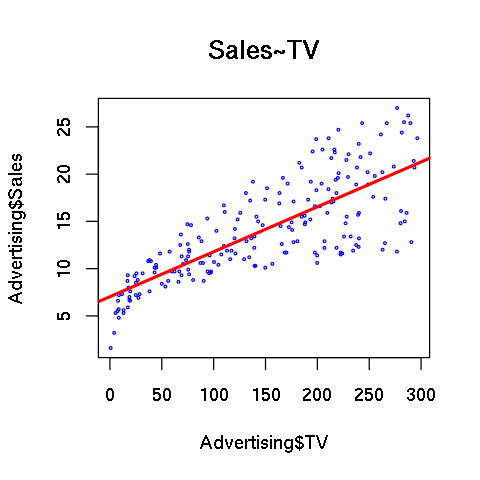

In [27]:
#
# Insert your code here
#

#library(gvlma)

lm.TV<-lm(data=Advertising, Sales~TV)
options(repr.plot.width=4, repr.plot.height=4)
plot(Advertising$TV,Advertising$Sales,cex=0.3,col="blue",main="Sales~TV")
abline(lm.TV,lwd=2.5,col="red")

#gvlma(lm.TV)
summary(lm.TV)


Call:
lm(formula = Sales ~ Radio, data = Advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.7305  -2.1324   0.7707   2.7775   8.1810 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.31164    0.56290  16.542   <2e-16 ***
Radio        0.20250    0.02041   9.921   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.275 on 198 degrees of freedom
Multiple R-squared:  0.332,	Adjusted R-squared:  0.3287 
F-statistic: 98.42 on 1 and 198 DF,  p-value: < 2.2e-16


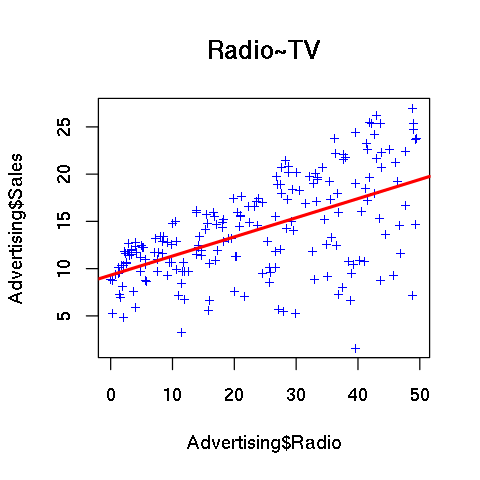

In [28]:
lm.Radio<-lm(data=Advertising, Sales~Radio)
options(repr.plot.width=4, repr.plot.height=4)
plot(Advertising$Radio,Advertising$Sales,pch='+',cex=0.8,col="blue",main="Radio~TV")
abline(lm.Radio,lwd=2.5,col="red")

#gvlma(lm.Radio)
summary(lm.Radio)


Call:
lm(formula = Sales ~ Newspaper, data = Advertising)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2272  -3.3873  -0.8392   3.5059  12.7751 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.35141    0.62142   19.88  < 2e-16 ***
Newspaper    0.05469    0.01658    3.30  0.00115 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.092 on 198 degrees of freedom
Multiple R-squared:  0.05212,	Adjusted R-squared:  0.04733 
F-statistic: 10.89 on 1 and 198 DF,  p-value: 0.001148


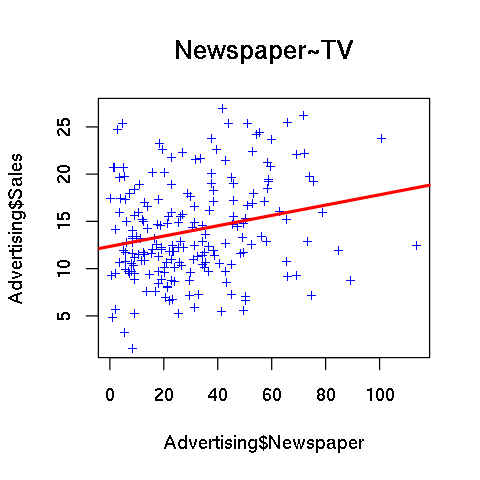

In [29]:
lm.Newspaper<-lm(data=Advertising, Sales~Newspaper)
options(repr.plot.width=4, repr.plot.height=4)
plot(Advertising$Newspaper,Advertising$Sales,pch='+',cex=0.8,col="blue",main="Newspaper~TV")
abline(lm.Newspaper,lwd=2.5,col="red")

#gvlma(lm.Newspaper)
summary(lm.Newspaper)

## 4. Multiple regression

In [30]:
Advertising<-read.csv("Advertising.csv")
Advertising<-Advertising[,-1]

In [31]:
str(Advertising)

'data.frame':	200 obs. of  4 variables:
 $ TV       : num  230.1 44.5 17.2 151.5 180.8 ...
 $ Radio    : num  37.8 39.3 45.9 41.3 10.8 48.9 32.8 19.6 2.1 2.6 ...
 $ Newspaper: num  69.2 45.1 69.3 58.5 58.4 75 23.5 11.6 1 21.2 ...
 $ Sales    : num  22.1 10.4 9.3 18.5 12.9 7.2 11.8 13.2 4.8 10.6 ...


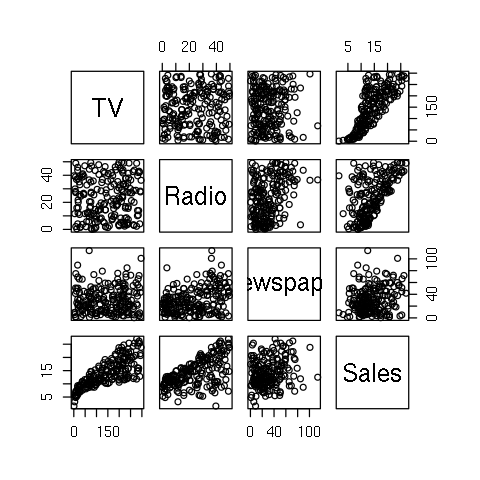

In [32]:
plot(Advertising)

In [33]:
cor(Advertising)
round(cor(Advertising),2)
round(cor(Advertising),1)

,TV,Radio,Newspaper,Sales
TV,1.00000000,0.05480866,0.05664787,0.7822244
Radio,0.05480866,1.00000000,0.35410375,0.5762226
Newspaper,0.05664787,0.35410375,1.00000000,0.2282990
Sales,0.78222442,0.57622257,0.22829903,1.0000000


,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.78
Radio,0.05,1.00,0.35,0.58
Newspaper,0.06,0.35,1.00,0.23
Sales,0.78,0.58,0.23,1.00


,TV,Radio,Newspaper,Sales
TV,1.0,0.1,0.1,0.8
Radio,0.1,1.0,0.4,0.6
Newspaper,0.1,0.4,1.0,0.2
Sales,0.8,0.6,0.2,1.0


Multiple linear regression of Sales on all three predictors

In [34]:
lm.Advertising.01<-lm(Sales~TV+Radio+Newspaper,data=Advertising)
summary(lm.Advertising.01)
anova(lm.Advertising.01)


Call:
lm(formula = Sales ~ TV + Radio + Newspaper, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


In [35]:
# Equivalent, alternative, notation
lm.Advertising.02<-lm(Sales~.,data=Advertising)
summary(lm.Advertising.02)
anova(lm.Advertising.02)


Call:
lm(formula = Sales ~ ., data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.8277 -0.8908  0.2418  1.1893  2.8292 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.938889   0.311908   9.422   <2e-16 ***
TV           0.045765   0.001395  32.809   <2e-16 ***
Radio        0.188530   0.008611  21.893   <2e-16 ***
Newspaper   -0.001037   0.005871  -0.177     0.86    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.686 on 196 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8956 
F-statistic: 570.3 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
TV,1,3.314618e+03,3.314618e+03,1.166731e+03,1.809337e-84
Radio,1,1.545617e+03,1.545617e+03,5.440501e+02,1.882722e-58
Newspaper,1,8.871717e-02,8.871717e-02,3.122805e-02,8.599151e-01
Residuals,196,5.568253e+02,2.840945e+00,NA,NA


## 5. The _Credit_ dataset

In [37]:
install.packages("ISLR", repos="https://cloud.r-project.org/")
require(ISLR)
data(Credit)
str(Credit)

Installing package into ‘/home/crquispq7.alumnes/R/x86_64-pc-linux-gnu-library/3.3’
(as ‘lib’ is unspecified)
Loading required package: ISLR


'data.frame':	400 obs. of  12 variables:
 $ ID       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Limit    : int  3606 6645 7075 9504 4897 8047 3388 7114 3300 6819 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 1 2 1 1 2 1 2 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 2 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 1 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 2 2 2 3 3 1 2 3 1 ...
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...


In [38]:
# See the Credit dataset help file 
# From the information we see there, we should:
# 1. Remove the ID from the dataset
# 2. Check the qualitative predictors are indeed coded as factors
Credit<-Credit[,-1]
str(Credit)

'data.frame':	400 obs. of  11 variables:
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Limit    : int  3606 6645 7075 9504 4897 8047 3388 7114 3300 6819 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Gender   : Factor w/ 2 levels " Male","Female": 1 2 1 2 1 1 2 1 2 2 ...
 $ Student  : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 2 ...
 $ Married  : Factor w/ 2 levels "No","Yes": 2 2 1 1 2 1 1 1 1 2 ...
 $ Ethnicity: Factor w/ 3 levels "African American",..: 3 2 2 2 3 3 1 2 3 1 ...
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...


In [39]:
# Isolate the quantitative variables from Credit (as in Figure 3.6)
with(Credit,Credit.Quant<<-data.frame(Balance,Age,Cards,Education, Income,Limit,Rating))
str(Credit.Quant)

'data.frame':	400 obs. of  7 variables:
 $ Balance  : int  333 903 580 964 331 1151 203 872 279 1350 ...
 $ Age      : int  34 82 71 36 68 77 37 87 66 41 ...
 $ Cards    : int  2 3 4 3 2 4 2 2 5 3 ...
 $ Education: int  11 15 11 11 16 10 12 9 13 19 ...
 $ Income   : num  14.9 106 104.6 148.9 55.9 ...
 $ Limit    : int  3606 6645 7075 9504 4897 8047 3388 7114 3300 6819 ...
 $ Rating   : int  283 483 514 681 357 569 259 512 266 491 ...


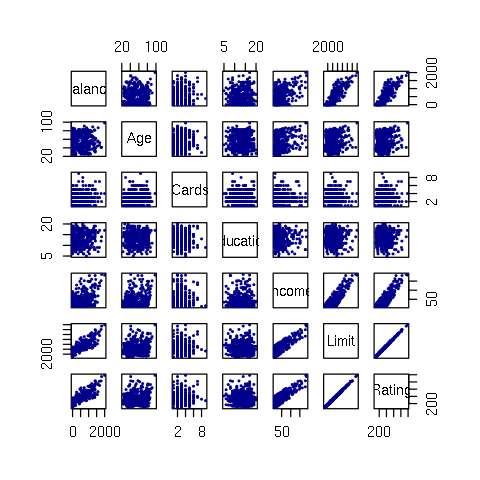

In [40]:
plot(Credit.Quant,pch=19,col="DarkBlue",cex=0.3)

In [41]:
round(cor(Credit.Quant),2)

,Balance,Age,Cards,Education,Income,Limit,Rating
Balance,1.00,0.00,0.09,-0.01,0.46,0.86,0.86
Age,0.00,1.00,0.04,0.00,0.18,0.10,0.10
Cards,0.09,0.04,1.00,-0.05,-0.02,0.01,0.05
Education,-0.01,0.00,-0.05,1.00,-0.03,-0.02,-0.03
Income,0.46,0.18,-0.02,-0.03,1.00,0.79,0.79
Limit,0.86,0.10,0.01,-0.02,0.79,1.00,1.00
Rating,0.86,0.10,0.05,-0.03,0.79,1.00,1.00


## 6. Regression with qualitative predictors

### Predicting `Balance` from `Gender`

In [42]:
lm.Credit.Gender<-lm(Balance~Gender,data=Credit)
summary(lm.Credit.Gender)
anova(lm.Credit.Gender)


Call:
lm(formula = Balance ~ Gender, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-529.54 -455.35  -60.17  334.71 1489.20 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)    509.80      33.13  15.389   <2e-16 ***
GenderFemale    19.73      46.05   0.429    0.669    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 460.2 on 398 degrees of freedom
Multiple R-squared:  0.0004611,	Adjusted R-squared:  -0.00205 
F-statistic: 0.1836 on 1 and 398 DF,  p-value: 0.6685


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Gender,1,38891.91,38891.91,0.1836156,0.6685161
Residuals,398,84301020.00,211811.61,NA,NA


In [45]:
X1<-model.matrix(lm.Credit.Gender)
print(X1)

    (Intercept) GenderFemale
1             1            0
2             1            1
3             1            0
4             1            1
5             1            0
6             1            0
7             1            1
8             1            0
9             1            1
10            1            1
11            1            0
12            1            0
13            1            1
14            1            0
15            1            1
16            1            1
17            1            1
18            1            1
19            1            1
20            1            0
21            1            1
22            1            1
23            1            0
24            1            0
25            1            1
26            1            1
27            1            1
28            1            0
29            1            1
30            1            1
31            1            1
32            1            0
33            1            1
34            

By default, `lm()` prepares a model matrix for a qualitative predictor entered as a `factor` with $g$ levels, adding $g-1$ columns constructed as follows: it takes one level as the base level and the remaining ones as "treatments" coded with dummy variables, where a $1$ in a given column means that the corresponding treatment is present.

The `contr.*()` functions are internally used to generate these columns. In the above example for the `Credit` data, the two-levels version was used.

In [44]:
contr.treatment(2)
contr.treatment(3)
contr.treatment(4)

2
0
1


2,3
0,0
1,0
0,1


2,3,4
0,0,0
1,0,0
0,1,0
0,0,1


Other codings are possible. For instance, if one does not want to distinguish one level as base:

In [46]:
contr.sum(2)
contr.sum(3)
contr.sum(4)

1
-1


1,0
0,1
-1,-1


1,0,0
0,1,0
0,0,1
-1,-1,-1


In [47]:
lm.Credit.Ethnicity<-lm(Balance~Ethnicity,data=Credit)
summary(lm.Credit.Ethnicity)
anova(lm.Credit.Ethnicity)


Call:
lm(formula = Balance ~ Ethnicity, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-531.00 -457.08  -63.25  339.25 1480.50 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          531.00      46.32  11.464   <2e-16 ***
EthnicityAsian       -18.69      65.02  -0.287    0.774    
EthnicityCaucasian   -12.50      56.68  -0.221    0.826    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 460.9 on 397 degrees of freedom
Multiple R-squared:  0.0002188,	Adjusted R-squared:  -0.004818 
F-statistic: 0.04344 on 2 and 397 DF,  p-value: 0.9575


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Ethnicity,2,18454.2,9227.1,0.04344278,0.9574919
Residuals,397,84321457.7,212396.6,NA,NA


### Interaction terms

In [48]:
lm.Advertising.Radio.TV.1<-lm(Sales~Radio+TV,data=Advertising)
summary(lm.Advertising.Radio.TV.1)
anova(lm.Advertising.Radio.TV.1)


Call:
lm(formula = Sales ~ Radio + TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.7977 -0.8752  0.2422  1.1708  2.8328 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.92110    0.29449   9.919   <2e-16 ***
Radio        0.18799    0.00804  23.382   <2e-16 ***
TV           0.04575    0.00139  32.909   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.681 on 197 degrees of freedom
Multiple R-squared:  0.8972,	Adjusted R-squared:  0.8962 
F-statistic: 859.6 on 2 and 197 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Radio,1,1798.669,1798.669201,636.2524,1.319743e-63
TV,1,3061.566,3061.565569,1082.9831,5.436980e-82
Residuals,197,556.914,2.826975,NA,NA


In [49]:
lm.Advertising.Radio.TV.2<-lm(Sales~Radio+TV+Radio:TV,,data=Advertising)
summary(lm.Advertising.Radio.TV.2)
anova(lm.Advertising.Radio.TV.2)


Call:
lm(formula = Sales ~ Radio + TV + Radio:TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
Radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
Radio:TV    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Radio,1,1798.6692,1798.6692010,2020.4741,3.477792e-105
TV,1,3061.5656,3061.5655690,3439.1060,3.003239e-126
Radio:TV,1,382.4306,382.4305974,429.5905,2.757681e-51
Residuals,196,174.4834,0.8902213,NA,NA


In [50]:
# Alternative syntax
lm.Advertising.Radio.TV.3<-lm(Sales~Radio*TV,data=Advertising)
summary(lm.Advertising.Radio.TV.3)
anova(lm.Advertising.Radio.TV.3)


Call:
lm(formula = Sales ~ Radio * TV, data = Advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3366 -0.4028  0.1831  0.5948  1.5246 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 6.750e+00  2.479e-01  27.233   <2e-16 ***
Radio       2.886e-02  8.905e-03   3.241   0.0014 ** 
TV          1.910e-02  1.504e-03  12.699   <2e-16 ***
Radio:TV    1.086e-03  5.242e-05  20.727   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9435 on 196 degrees of freedom
Multiple R-squared:  0.9678,	Adjusted R-squared:  0.9673 
F-statistic:  1963 on 3 and 196 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Radio,1,1798.6692,1798.6692010,2020.4741,3.477792e-105
TV,1,3061.5656,3061.5655690,3439.1060,3.003239e-126
Radio:TV,1,382.4306,382.4305974,429.5905,2.757681e-51
Residuals,196,174.4834,0.8902213,NA,NA


Interaction of a quantitative predictor and a qualitative predictor in the `Credit` dataset

In [51]:
lm.Credit.Income.Student.1<-lm(Balance~Income+Student,data=Credit)
summary(lm.Credit.Income.Student.1)
anova(lm.Credit.Income.Student.1)


Call:
lm(formula = Balance ~ Income + Student, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-762.37 -331.38  -45.04  323.60  818.28 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.1430    32.4572   6.505 2.34e-10 ***
Income        5.9843     0.5566  10.751  < 2e-16 ***
StudentYes  382.6705    65.3108   5.859 9.78e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 391.8 on 397 degrees of freedom
Multiple R-squared:  0.2775,	Adjusted R-squared:  0.2738 
F-statistic: 76.22 on 2 and 397 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Income,1,18131167,18131167.4,118.11922,2.915457e-24
Student,1,5269691,5269690.9,34.33049,9.775720e-09
Residuals,397,60939054,153498.9,NA,NA


In [52]:
lm.Credit.Income.Student.2<-lm(Balance~Income*Student,data=Credit)
summary(lm.Credit.Income.Student.2)
anova(lm.Credit.Income.Student.2)


Call:
lm(formula = Balance ~ Income * Student, data = Credit)

Residuals:
    Min      1Q  Median      3Q     Max 
-773.39 -325.70  -41.13  321.65  814.04 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       200.6232    33.6984   5.953 5.79e-09 ***
Income              6.2182     0.5921  10.502  < 2e-16 ***
StudentYes        476.6758   104.3512   4.568 6.59e-06 ***
Income:StudentYes  -1.9992     1.7313  -1.155    0.249    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 391.6 on 396 degrees of freedom
Multiple R-squared:  0.2799,	Adjusted R-squared:  0.2744 
F-statistic:  51.3 on 3 and 396 DF,  p-value: < 2.2e-16


,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Income,1,18131167.4,18131167.4,118.218426,2.850251e-24
Student,1,5269690.9,5269690.9,34.359319,9.660516e-09
Income:Student,1,204508.6,204508.6,1.333432,2.488919e-01
Residuals,396,60734545.0,153370.1,NA,NA


## 7. The _House prices_ dataset

From Kaggle [House Prices: Advanced Regression Techniques](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/discussion)